In [10]:
%pip install numpy pandas scikit-learn seaborn optuna

  Obtaining dependency information for optuna from https://files.pythonhosted.org/packages/15/da/68883911855d8b4d521f9a370e4e6aab8232b91c1d8d5a8348c4680c6642/optuna-3.6.1-py3-none-any.whl.metadata
  Obtaining dependency information for alembic>=1.5.0 from https://files.pythonhosted.org/packages/7f/50/9fb3a5c80df6eb6516693270621676980acd6d5a9a7efdbfa273f8d616c7/alembic-1.13.1-py3-none-any.whl.metadata
  Obtaining dependency information for colorlog from https://files.pythonhosted.org/packages/f3/18/3e867ab37a24fdf073c1617b9c7830e06ec270b1ea4694a624038fc40a03/colorlog-6.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for sqlalchemy>=1.3.0 from https://files.pythonhosted.org/packages/a4/0e/0aea34594a2bd84e8637b45490041ee3d9107bc786053364bff2337dea8b/SQLAlchemy-2.0.29-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tqdm from https://files.pythonhosted.org/packages/2a/14/e75e52d521442e2fcc9f1df3c5e456aead034203d4797

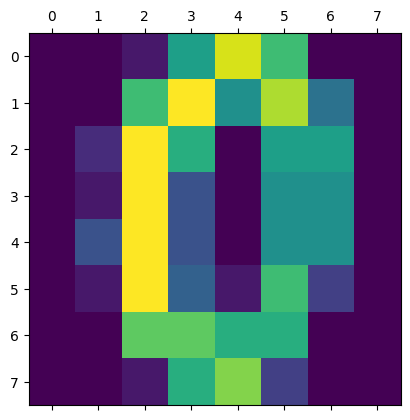

In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

digits.data.shape
plt.matshow(digits.images[10])

# This is an example image

In [16]:
from sklearn.decomposition import PCA

X = digits.data
y = digits.target
print(X)
print(y)
print(X.shape)
print(y.shape)


[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]
(1797, 64)
(1797,)


In [4]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

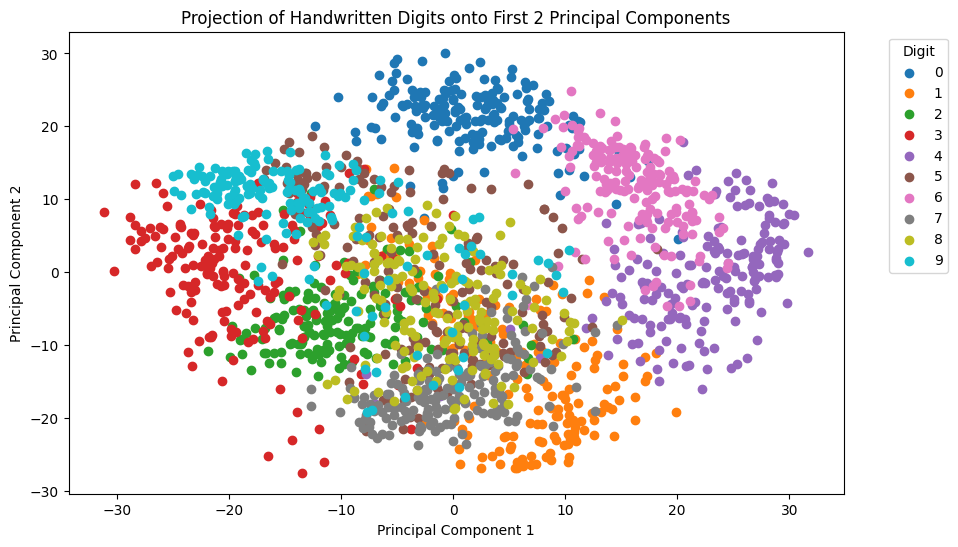

In [5]:
plt.figure(figsize=[10,6])

for i in range(10):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=str(i))

plt.title('Projection of Handwritten Digits onto First 2 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Digit', bbox_to_anchor=(1.05, 1), loc='upper left')


CPV at 2 PCs: 0.29


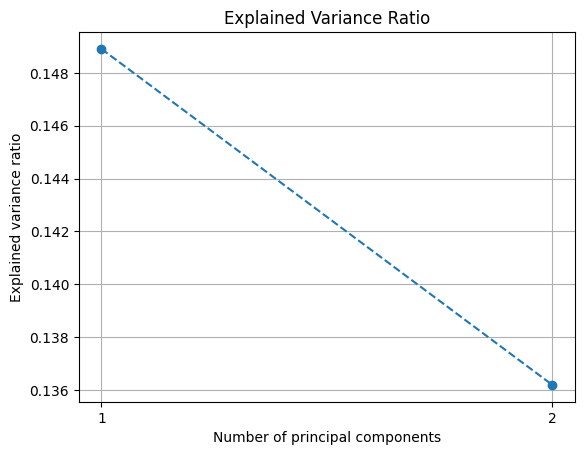

In [7]:
plt.figure()
plt.plot(range(1,3), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio')
plt.xlabel('Number of principal components')
plt.ylabel('Explained variance ratio')
plt.xticks(range(1,3))
plt.grid(True)

cpv_2pcs = sum(pca.explained_variance_ratio_[:2])
print(f"CPV at 2 PCs: {cpv_2pcs:.2f}")
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


X = X_pca
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=16)
print(X_train.shape)
print(X_test.shape)

(1257, 2)
(540, 2)


In [26]:
import optuna

def objective(trial):
    C = trial.suggest_float('C', 0.1, 10, step=0.1)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'sigmoid', 'rbf'])
    degree = trial.suggest_int('degree', 1, 3, step=1)
    gamma = trial.suggest_float('gamma', 0.001, 1, log=True)
    tol = trial.suggest_float('tol', 1e-10, 1e-3, log=True)

    clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, tol=tol)
    clf = clf.fit(X_train, y_train.ravel())
    return clf.score(X_test, y_test.ravel())

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)
best_params = study.best_params

[I 2024-04-03 22:24:13,033] A new study created in memory with name: no-name-a51a8fd7-00e8-4bf5-97b7-6e87445729e5
[I 2024-04-03 22:24:21,460] Trial 0 finished with value: 0.6092592592592593 and parameters: {'C': 0.5, 'kernel': 'linear', 'degree': 2, 'gamma': 0.0664638899249427, 'tol': 8.699594094481881e-09}. Best is trial 0 with value: 0.6092592592592593.
[I 2024-04-03 22:24:26,097] Trial 1 finished with value: 0.6111111111111112 and parameters: {'C': 9.9, 'kernel': 'linear', 'degree': 1, 'gamma': 0.016684676120076177, 'tol': 4.412703539717307e-05}. Best is trial 1 with value: 0.6111111111111112.
[I 2024-04-03 22:24:26,149] Trial 2 finished with value: 0.6111111111111112 and parameters: {'C': 6.4, 'kernel': 'poly', 'degree': 1, 'gamma': 0.00663890380583004, 'tol': 5.74012810723654e-07}. Best is trial 1 with value: 0.6111111111111112.
[I 2024-04-03 22:24:26,296] Trial 3 finished with value: 0.10740740740740741 and parameters: {'C': 2.3000000000000003, 'kernel': 'sigmoid', 'degree': 1, '

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix


best_model = SVC(**best_params)
best_model.fit(X_train, y_train.ravel())

y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)


train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training accuracy: {train_accuracy * 100:.2f}%")
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
train_cm = confusion_matrix(y_train, y_train_pred)
print("Confusion Matrix for Training Set:")
print(train_cm)

In [ ]:
test_cm = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix for Test Set:")
print(test_cm)